In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'PlantVillage',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 2475 images belonging to 2 classes.


In [4]:
train_generator.class_indices

{'Bacterial_spot': 0, 'Healthy': 1}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Bacterial_spot', 'Healthy']

In [6]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.67909193 0.6437978  0.72615075]
  [0.6748819  0.63958776 0.7219407 ]
  [0.68503326 0.64973915 0.7320921 ]
  ...
  [0.7225466  0.69509554 0.7656838 ]
  [0.7236881  0.69623715 0.7668254 ]
  [0.72482973 0.69737875 0.767967  ]]

 [[0.6802335  0.64493936 0.72729236]
  [0.67545265 0.64015853 0.7225115 ]
  [0.6833209  0.64802676 0.7303797 ]
  ...
  [0.739938   0.71248704 0.7830753 ]
  [0.74336284 0.71591187 0.7865001 ]
  [0.7467876  0.7193366  0.78992486]]

 [[0.6813751  0.646081   0.7284339 ]
  [0.6760235  0.6407293  0.7230823 ]
  [0.6816085  0.6463143  0.7286673 ]
  ...
  [0.7490196  0.72156864 0.79215693]
  [0.7490196  0.72156864 0.79215693]
  [0.7490196  0.72156864 0.79215693]]

 ...

 [[0.6819022  0.6270003  0.69366693]
  [0.6596412  0.60473925 0.6714059 ]
  [0.6373802  0.5824782  0.6491449 ]
  ...
  [0.6345496  0.5835692  0.66200066]
  [0.635019   0.5840386  0.66247   ]
  [0.65883356 0.6078532  0.68628454]]

 [[0.5640704  0.50916845 0.57583517]
  [0.59318095 0.538279   0.60494566]


In [8]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'PlantVillage',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 2475 images belonging to 2 classes.


In [9]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'PlantVillage',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 2475 images belonging to 2 classes.


In [10]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.72962964 0.65511984 0.6002178 ]
  [0.75273937 0.6782296  0.6233276 ]
  [0.72189623 0.64738643 0.5924845 ]
  ...
  [0.77941024 0.7245083  0.68137103]
  [0.7807862  0.72588426 0.682747  ]
  [0.7821623  0.7272603  0.68412304]]

 [[0.7286289  0.6541191  0.5992171 ]
  [0.75374013 0.67923033 0.6243284 ]
  [0.7227719  0.6482621  0.5933601 ]
  ...
  [0.8209341  0.7660321  0.72289485]
  [0.8215596  0.7666576  0.72352034]
  [0.82218504 0.767283   0.72414577]]

 [[0.7276282  0.6531183  0.59821635]
  [0.75474083 0.68023103 0.6253291 ]
  [0.72364753 0.64913774 0.5942357 ]
  ...
  [0.8378995  0.78299755 0.7398603 ]
  [0.837274   0.78237206 0.7392348 ]
  [0.8366486  0.7817466  0.7386094 ]]

 ...

 [[0.7176471  0.6117647  0.54509807]
  [0.7176471  0.6117647  0.54509807]
  [0.7176471  0.6117647  0.54509807]
  ...
  [0.7989471  0.73620194 0.6773784 ]
  [0.7451551  0.68241    0.6235865 ]
  [0.7557938  0.6930487  0.6342252 ]]

 [[0.70061636 0.594734   0.52806735]
  [0.6999909  0.5941086  0.5274419 ]


In [11]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 13s 227ms/step - loss: 0.7043 - accuracy: 0.6290 - val_loss: 0.6181 - val_accuracy: 0.6927
Epoch 2/20
47/47 [==============================] - 10s 215ms/step - loss: 0.4920 - accuracy: 0.7753 - val_loss: 0.6123 - val_accuracy: 0.7396
Epoch 3/20
47/47 [==============================] - 10s 213ms/step - loss: 0.2891 - accuracy: 0.8863 - val_loss: 0.2229 - val_accuracy: 0.9062
Epoch 4/20
47/47 [==============================] - 10s 221ms/step - loss: 0.1879 - accuracy: 0.9368 - val_loss: 0.1471 - val_accuracy: 0.9375
Epoch 5/20
47/47 [==============================] - 10s 210ms/step - loss: 0.1186 - accuracy: 0.9616 - val_loss: 0.1128 - val_accuracy: 0.9583
Epoch 6/20
47/47 [==============================] - 10s 214ms/step - loss: 0.0774 - accuracy: 0.9754 - val_loss: 0.0685 - val_accuracy: 0.9792
Epoch 7/20
47/47 [==============================] - 10s 213ms/step - loss: 0.0669 - accuracy: 0.9794 - val_loss: 0.0216 - val_accuracy: 0.9896

In [15]:
scores = model.evaluate(test_generator)
scores

78/78 [==============================] - 15s 184ms/step - loss: 0.0059 - accuracy: 0.9988


[0.005854062270373106, 0.9987878799438477]

In [18]:
history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

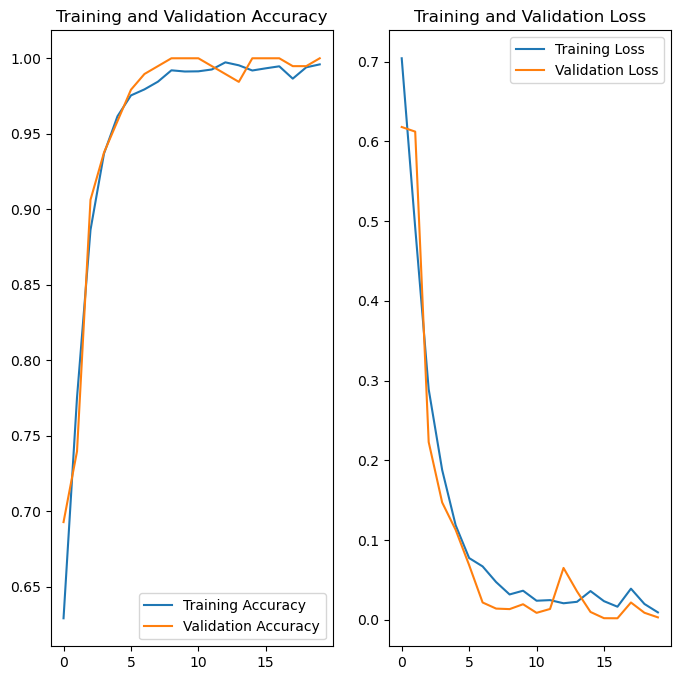

In [19]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Healthy
1/1 [==============================] - 0s 114ms/step
predicted label: Healthy


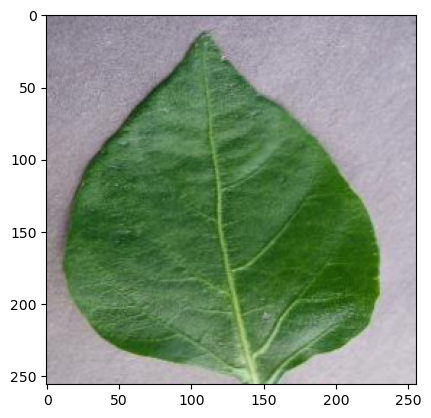

In [22]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [23]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 11ms/step


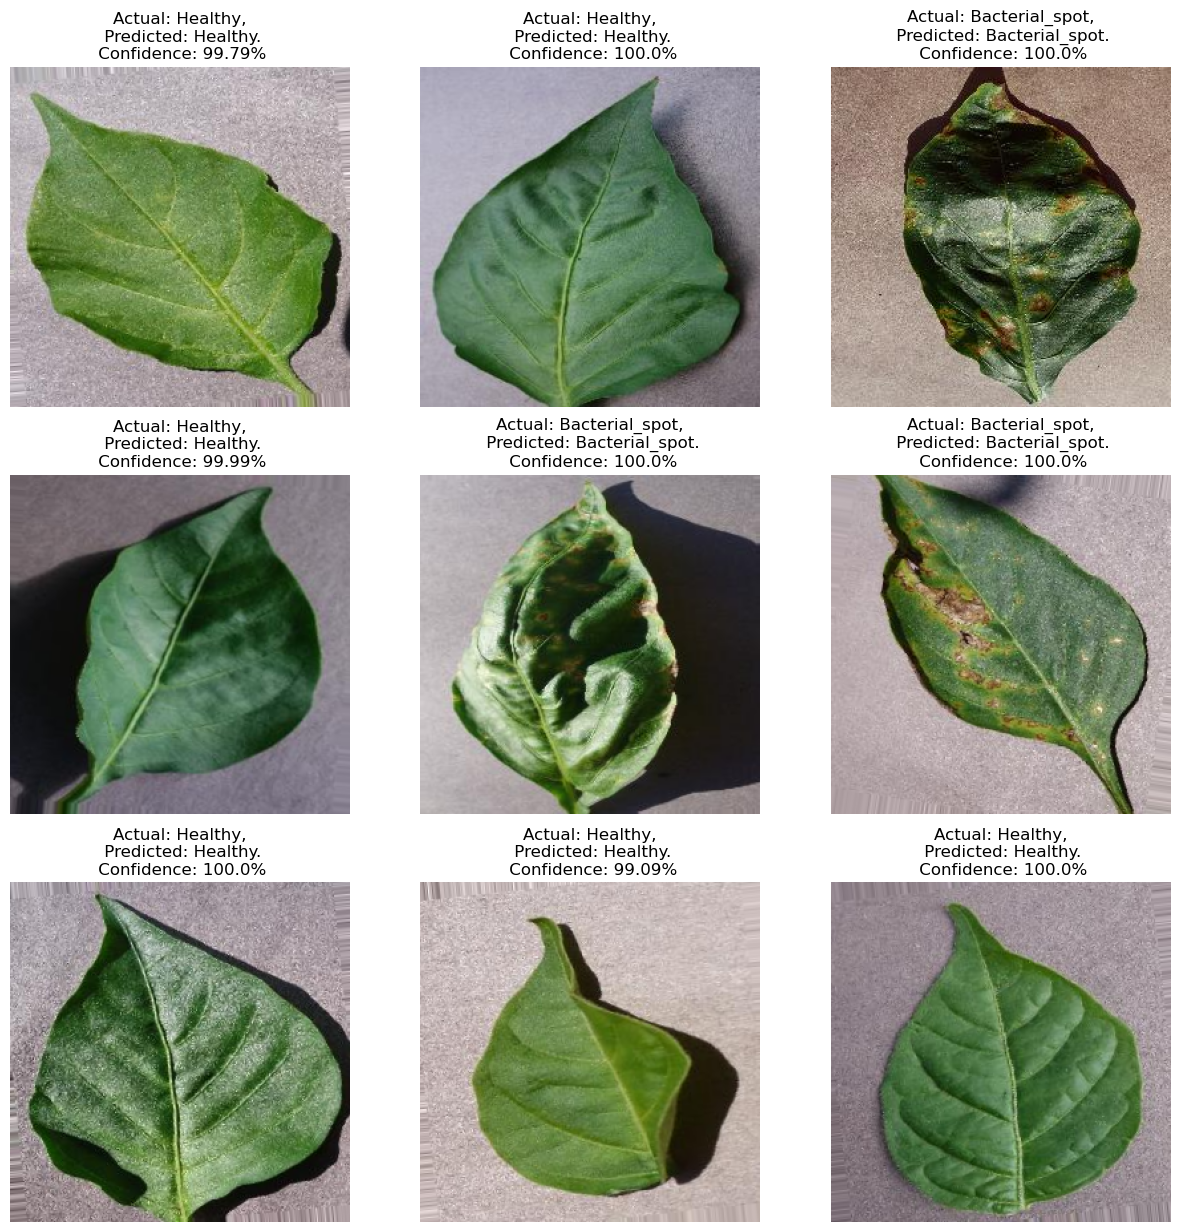

In [24]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [27]:
model.save("./pepper.h5")

In [28]:
#confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

model = load_model('pepper.h5')

test_dir = 'PlantVillage'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),  # Set your image dimensions
    batch_size=1,
    class_mode='categorical',
    shuffle=False  # Important: Do not shuffle for confusion matrix
)

Found 2475 images belonging to 2 classes.


In [29]:
true_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

2475/2475 [==============================] - 4s 2ms/step


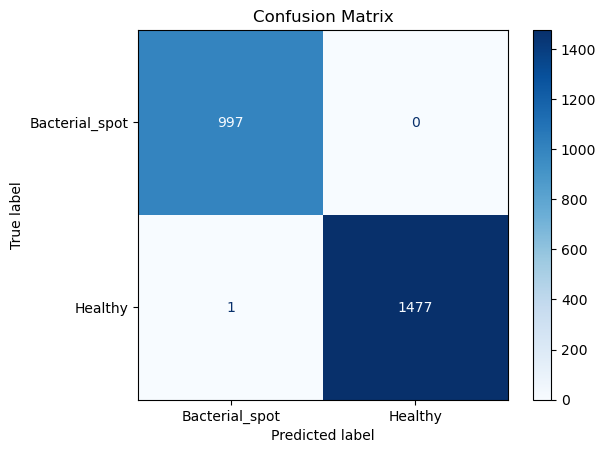

In [30]:
cm = confusion_matrix(true_labels, predicted_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()